# Treinamento do Modelo Transportation x Resto (Não transportation)
Luana Barros

In [0]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd
import librosa
import librosa.display
import os
from os import path
import io
!pip3 install soundfile
!pip3 install librosa
import soundfile as sf
import librosa.feature


In [0]:
!pip install ipython-autotime

%load_ext autotime

Dataset de nomes e labels de todas as músicas, disponibilizado pelo DCASE

In [4]:
DIR = '/content/drive/My Drive/DCASE 2020 Challenge/TAU Urban Acoustic Scenes 2020 3Class' 
DIR_AUDIO = DIR + '/soundfiles/TAU-urban-acoustic-scenes-2020-3class-development/'
df_meta = pd.read_csv(f'{DIR}/meta.csv')
df_meta = pd.read_csv(io.StringIO(df_meta.to_csv(index=False)))
df_meta.head()

,filename,scene_label,identifier
0,audio/airport-barcelona-0-0-a.wav,indoor,barcelona-0
1,audio/airport-barcelona-0-10-a.wav,indoor,barcelona-0
2,audio/airport-barcelona-0-11-a.wav,indoor,barcelona-0
3,audio/airport-barcelona-0-12-a.wav,indoor,barcelona-0
4,audio/airport-barcelona-0-13-a.wav,indoor,barcelona-0


time: 1.06 s


In [5]:
df_meta.values.shape

(14400, 3)

time: 2.98 ms


In [6]:
df_meta = df_meta[df_meta['scene_label'] != 'transportation']

time: 4.2 ms


In [7]:
print(df_meta.loc[df_meta['scene_label'] == 'outdoor'].shape)
print(df_meta.loc[df_meta['scene_label'] == 'indoor'].shape)
print(df_meta.loc[df_meta['scene_label'] == 'transportation'].shape)

(5760, 3)
(4320, 3)
(0, 3)
time: 8.34 ms


Reading the datasets and storing it to 'signals'

In [8]:
info_sound = df_meta[['filename','scene_label']].to_numpy()
np.unique(info_sound).shape

(10082,)

time: 17.6 ms


In [10]:
FILEPATH = '/content/drive/My Drive/DCASE 2020 Challenge/TAU Urban Acoustic Scenes 2020 3Class/features.csv'
BASE_PATH = '/content/drive/My Drive/DCASE 2020 Challenge/TAU Urban Acoustic Scenes 2020 3Class/'

time: 1.03 ms


Labels:


0.   Indoor
1.   Outdoor
2.   Transportation



Função que calcula as features de uma única música, NÃO dividindo o sinal e salva no final de um dataframe de features lido posteriormente

In [33]:
PARTS = 10
def get_features(filename, signal, label)->pd.DataFrame:
    def get_centroid(y, sr):
        return librosa.feature.spectral_centroid(y=y, sr=sr)
    def get_flatness(y):
        return librosa.feature.spectral_flatness(y=y)
    def get_rms(y):
        return librosa.feature.rms(y=y)
    def get_mfccs(y, sr):
        return librosa.feature.mfcc(y=y, sr=sr, n_mfcc=5)

    feats = (np.zeros((1,18))[0])
    music_features = []
    signal = signal[:,0]
    c = get_centroid(signal, SAMPLERATE)
    f = get_flatness(signal)
    rms = get_rms(signal)
    mfccs = get_mfccs(signal, SAMPLERATE)
    mfccs_mean = [np.mean(x) for x in mfccs]
    mfccs_std = [np.std(x) for x in mfccs]
    music_features = np.hstack([arr_mfcc, np.array([np.mean(c),np.std(c),np.mean(f), np.std(f),np.mean(rms),np.std(rms)]), mfccs_mean, mfccs_std, filename, label])       
    return pd.DataFrame(data=music_features).drop(0).reset_index(drop=True)

time: 13.4 ms


Função que importa o sinal de áudio e calcula as features (Deixo comentado pq já estão calculadas)

In [14]:
'''SAMPLERATE = 48000
for filename, label in info_sound:
    if(path.isfile(os.path.join(DIR_AUDIO, filename))):
        signal, sr = sf.read(os.path.join(DIR_AUDIO, filename))
        signal = signal - np.mean(signal)
        signal = signal / np.std(signal)
        feats = get_features(filename, signal, label)
        #print(feats.iloc[0,:])
        if (create_new): 
            feats.to_csv(FILEPATH, mode='w', header=True, index=False)
            create_new = False
        else:
            feats.to_csv(FILEPATH, mode='a', header=False, index=False)'''

"SAMPLERATE = 48000\nfor filename, label in info_sound:\n    if(path.isfile(os.path.join(DIR_AUDIO, filename))):\n        signal, sr = sf.read(os.path.join(DIR_AUDIO, filename))\n        signal = signal - np.mean(signal)\n        signal = signal / np.std(signal)\n        feats = get_features(filename, signal, label)\n        #print(feats.iloc[0,:])\n        if (create_new): \n            feats.to_csv(FILEPATH, mode='w', header=True, index=False)\n            create_new = False\n        else:\n            feats.to_csv(FILEPATH, mode='a', header=False, index=False)"

time: 3.06 ms


# Reading Features Dataframe

DF: Descrição

        features
*   0: média centroide 
*   1: std centroide
*   2: media flatness
*   3: std flatness
*   4: média rms
*   5: std rms
*   6-10: media mfccs
*   11-15: std mfccs


        outros
*   16: name
*   17: label






Aqui, acabei lendo um dataframe pronto de features do álvaro

In [15]:
df = pd.read_csv('/content/drive/My Drive/DCASE 2020 Challenge/TAU Urban Acoustic Scenes 2020 3Class/data_final.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.002238,0.000558,0.002743,0.007208,1048.711547,463.167051,-577.001380,163.258139,-3.549339,22.017591,13.494924,31.869020,21.825554,12.326134,10.821680,9.552340,1.0
1,0.002880,0.000903,0.001126,0.001958,886.422711,241.592415,-563.894864,174.513166,-14.495222,23.946321,18.321768,29.040112,16.301472,13.782981,8.090115,8.115766,1.0
2,0.001869,0.000431,0.001523,0.001664,945.652024,221.316045,-593.787671,168.131292,-8.964122,24.838048,15.403514,22.797653,16.934774,9.883444,9.331934,8.159728,1.0
3,0.002032,0.000947,0.002943,0.003316,1164.856147,344.481524,-578.611030,152.952367,-0.808523,18.432182,11.709905,25.279528,19.047370,12.422158,9.473015,9.504347,1.0
4,0.002016,0.000527,0.001742,0.001874,966.899681,252.108832,-578.576194,171.175143,-13.635943,22.459849,15.334096,21.597844,17.593605,9.983420,9.635203,8.164152,1.0


time: 926 ms


In [16]:
transp = df.loc[df['16'] == 2]

time: 2.37 ms


In [17]:
indoor = (df.loc[df['16'] == 0]).sample(1440, random_state=42)

time: 4.46 ms


In [18]:
outdoor = (df.loc[df['16'] == 1]).sample(1440, random_state=42)

time: 4.43 ms


Balanceei a quantidade de músicas de cada label

In [19]:
transp.values.shape,indoor.values.shape, outdoor.values.shape 

((2880, 17), (1440, 17), (1440, 17))

time: 2.8 ms


In [20]:
df = pd.concat([transp, indoor, outdoor])

time: 2.28 ms


Juntando indoor com outdoor

In [21]:
df.loc[df['16'] == 2, '16'] = 'yes_transp'
df.loc[df['16'] != 'yes_transp', '16'] = 'not_transp'

time: 8.37 ms


In [34]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1440,0.020406,0.006326,0.000159,0.000381,438.661378,253.467548,-504.367146,165.040784,18.924291,17.198516,28.085752,47.958075,15.157123,18.888637,9.283565,7.533329,yes_transp
1441,0.023096,0.004342,0.000034,0.000093,313.443504,173.421574,-549.687879,161.154220,29.183161,20.196307,29.539300,24.663102,13.132203,9.816342,9.120574,7.109063,yes_transp
1442,0.023684,0.005952,0.000005,0.000012,187.749891,65.610972,-557.346817,169.462508,31.192148,9.295133,33.732378,11.967958,6.261512,8.250277,7.041316,4.829986,yes_transp
1443,0.028563,0.014444,0.000045,0.000059,340.880546,117.510752,-470.998773,156.807357,31.255668,20.099788,29.951104,30.679529,10.649638,13.592999,10.174730,5.857045,yes_transp
1444,0.020506,0.006390,0.000095,0.000141,394.875465,157.107692,-490.497708,184.020153,23.895086,23.438850,29.550718,28.326797,18.646410,9.239509,10.717194,8.266267,yes_transp


time: 38.8 ms


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pickle
from collections import Counter
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import train_test_split

time: 2.09 ms


Split no dataframe df_meta, selecionando músicas de teste e treino

In [24]:
def split_train_test(df):
    X, y = df.iloc[:,:16], df.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
    return [X_train, X_test, y_train, y_test]

time: 78.2 ms


In [25]:
def standardize(X_train, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train.values)
    joblib.dump(scaler, BASE_PATH + 'scaler_transp.pkl')
    X_train = scaler.transform(X_train.values)
    X_test = scaler.transform(X_test.values)
    return [X_train, X_test]

time: 3.01 ms


# Linear SVC Classifier

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.externals import joblib

time: 4.74 ms


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [27]:
def get_model_linearSVC(X_train,y_train, y_test, X_test):
    LSVC = LinearSVC(C = 1, dual=False, random_state=42)
    LSVC.fit(X_train,y_train)
    y_pred = LSVC.predict(X_test)
    print("LSVC Accuracy :", accuracy_score(y_test, y_pred))
    filename = BASE_PATH + 'linearsvc_transp_resto.pkl'
    joblib.dump(LSVC, filename,compress=0)
    return LSVC, y_pred, accuracy_score(y_test, y_pred)

time: 3.91 ms


Contagem das predições para cada música

In [28]:
def plot_cf(y_pred, y_test):
    print(classification_report(y_test, y_pred))

time: 1.12 ms


In [29]:
def pca(X_train, X_test, y_train, y_test):
    pca = PCA(2)
    scl = StandardScaler()
    X = np.vstack([X_train,X_test])
    y = np.hstack([y_train,y_test])
    X_scl = scl.fit_transform(X)
    pca.fit(X_scl)
    X_pca = pca.transform(X_scl)
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],hue=y)

time: 4.49 ms


In [30]:
def classify(df):
    X_train, X_test, y_train, y_test = split_train_test(df) 
    X_train, X_test = standardize(X_train, X_test)
    model, y_pred, final_accuracy = get_model_linearSVC(X_train, y_train, y_test, X_test)
    pca(X_train, X_test, y_train, y_test)

time: 2.67 ms


LSVC Accuracy : 0.9236111111111112


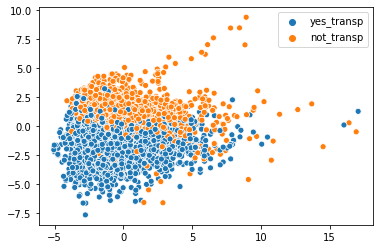

time: 1.4 s


In [31]:
classify(df)

Tamanho do modelo em KB

In [32]:
(os.path.getsize(BASE_PATH + 'linearsvc_transp_resto.pkl')/1024)

1.1484375

time: 2.77 ms
